# House Price Prediction

In [3]:
# imports
%reset
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import statsmodels.api
from statsmodels.api import graphics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [6]:
from vecstack import stacking

In [50]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

In [10]:
house_prices_train = pd.read_csv("C:\\Users\\Shehjar Raina\\Desktop\\CIS 508 Data Mining\\TA1\\train.csv")
house_prices_test = pd.read_csv("C:\\Users\\Shehjar Raina\\Desktop\\CIS 508 Data Mining\\TA1\\test.csv")

In [11]:
house_prices_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [12]:
house_prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
house_prices_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [14]:
house_prices_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## EDA

In [15]:
house_prices_train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [16]:
house_prices_train = house_prices_train.drop(["Id"], axis = 1)
house_prices_test = house_prices_test.drop(["Id"], axis = 1)

In [17]:
house_prices_train.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  

[1 rows x 80 columns]

In [18]:
house_prices_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

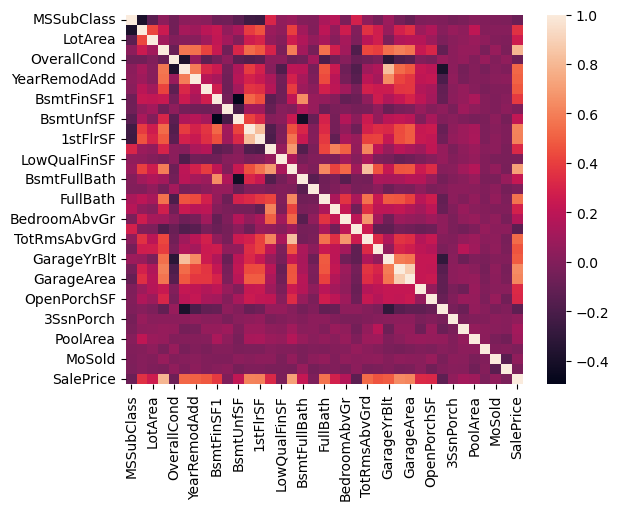

In [19]:
sns.heatmap(house_prices_train.corr())
plt.show()

We can observe that few variables are highly correlated which may lead to multicollinearity

In [20]:
possible_high_corr_df = house_prices_train[["OverallQual","TotalBsmtSF","GarageCars","GarageArea","GrLivArea","SalePrice"]]
possible_high_corr_df.corr()

OverallQual  TotalBsmtSF  GarageCars  GarageArea  GrLivArea  \
OverallQual     1.000000     0.537808    0.600671    0.562022   0.593007   
TotalBsmtSF     0.537808     1.000000    0.434585    0.486665   0.454868   
GarageCars      0.600671     0.434585    1.000000    0.882475   0.467247   
GarageArea      0.562022     0.486665    0.882475    1.000000   0.468997   
GrLivArea       0.593007     0.454868    0.467247    0.468997   1.000000   
SalePrice       0.790982     0.613581    0.640409    0.623431   0.708624   

             SalePrice  
OverallQual   0.790982  
TotalBsmtSF   0.613581  
GarageCars    0.640409  
GarageArea    0.623431  
GrLivArea     0.708624  
SalePrice     1.000000

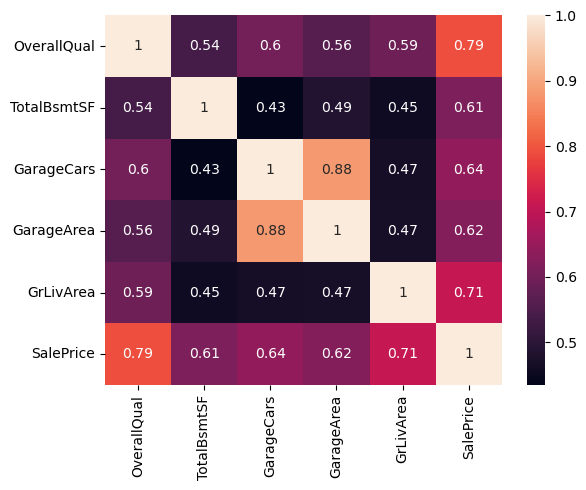

In [21]:
sns.heatmap(possible_high_corr_df.corr(),annot=True)
plt.show()

OverallQual and GrLivArea are highly positively correlated with SalePrice while othee features; TotalBSMTSF, GarageCars, GarageArea are positively correlated with SalePrice

In [22]:
sns.lmplot(x="GrLivArea", y="SalePrice", data =house_prices_train )
plt.show()

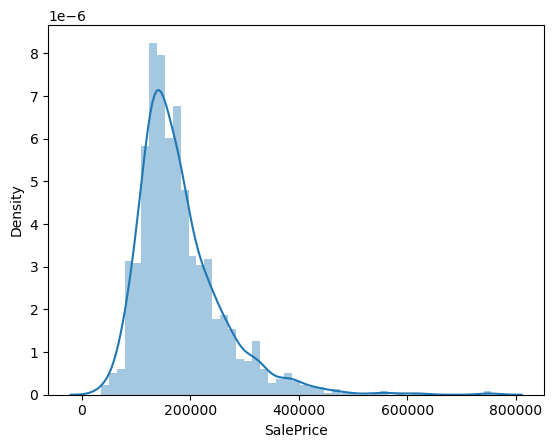

In [23]:
sns.distplot(house_prices_train.SalePrice)
plt.show()

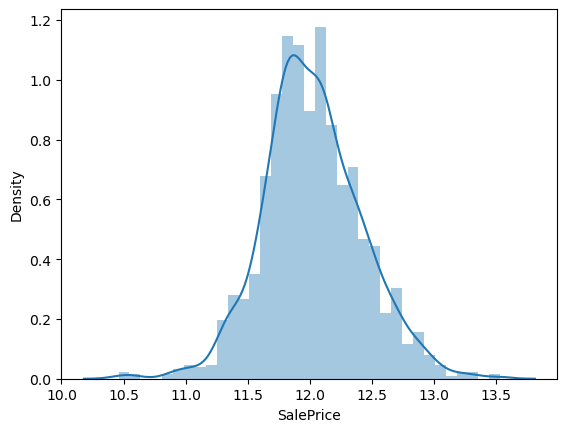

In [24]:
sns.distplot(np.log(house_prices_train.SalePrice))
plt.show()

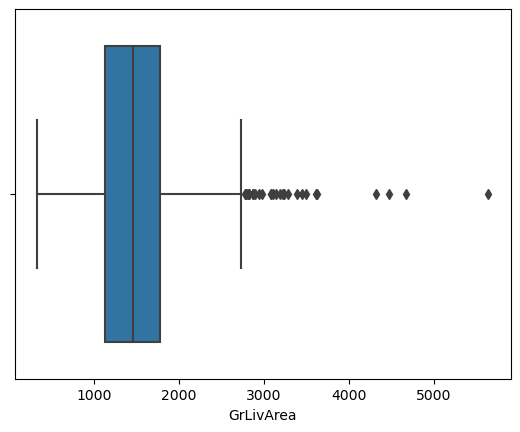

In [25]:
sns.boxplot(house_prices_train.GrLivArea)
plt.show()

In [26]:
#remove all the outliers from GrLivArea as it has high correlation with SalePrice
house_prices_train = house_prices_train.drop(house_prices_train[(house_prices_train['GrLivArea']>4000)].index)

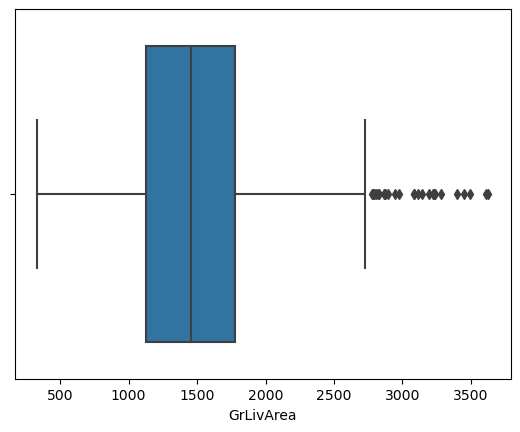

In [27]:
sns.boxplot(house_prices_train.GrLivArea)
plt.show()

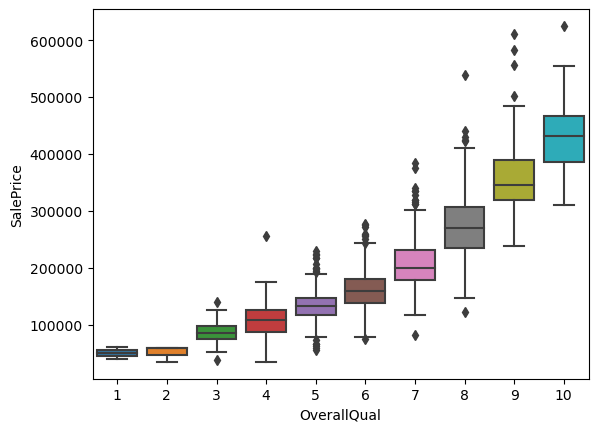

In [28]:
sns.boxplot(x = house_prices_train.OverallQual, y = house_prices_train.SalePrice)
plt.show()

If the OverallQual increases, the SalePrice increases, we can verify this from the boxplots. Few outliers are present.

## Feature Engineering

Impute Missing values

In [29]:
#Impute missing values 
#Few houses might not have features like pool, fireplace etc and hence they have NA values. Therefore,
# all the NA values are treated as None. 
for column_name in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass','BsmtQual', 'BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinType2'):
    house_prices_train[column_name] = house_prices_train[column_name].fillna('None')
    house_prices_test[column_name] = house_prices_test[column_name].fillna('None')


In [30]:
#Missing values for area of garage and basement can be treated as 0, which means that there is no garage or basement in the house
for column_name in ('GarageYrBlt','GarageArea', 'GarageCars','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    house_prices_train[column_name] = house_prices_train[column_name].fillna(0)
    house_prices_test[column_name] = house_prices_test[column_name].fillna(0)

In [31]:
#Set mode values for missing values for other continuous variables
house_prices_train ['MSZoning'] = house_prices_train['MSZoning'].fillna(house_prices_train['MSZoning'].mode()[0])
house_prices_test ['MSZoning'] = house_prices_test['MSZoning'].fillna(house_prices_test['MSZoning'].mode()[0])
house_prices_train ['Electrical'] = house_prices_train['Electrical'].fillna(house_prices_train['Electrical'].mode()[0])
house_prices_test ['Electrical'] = house_prices_test['Electrical'].fillna(house_prices_test['Electrical'].mode()[0])
house_prices_train ['KitchenQual'] = house_prices_train['KitchenQual'].fillna(house_prices_train['KitchenQual'].mode()[0])
house_prices_test ['KitchenQual'] = house_prices_test['KitchenQual'].fillna(house_prices_test['KitchenQual'].mode()[0])
house_prices_train ['Exterior1st'] = house_prices_train['Exterior1st'].fillna(house_prices_train['Exterior1st'].mode()[0])
house_prices_test ['Exterior1st'] = house_prices_test['Exterior1st'].fillna(house_prices_test['Exterior1st'].mode()[0])
house_prices_train ['Exterior2nd'] = house_prices_train['Exterior2nd'].fillna(house_prices_train['Exterior2nd'].mode()[0])
house_prices_test ['Exterior2nd'] = house_prices_test['Exterior2nd'].fillna(house_prices_test['Exterior2nd'].mode()[0])
house_prices_train ['SaleType'] = house_prices_train['SaleType'].fillna(house_prices_train['SaleType'].mode()[0])
house_prices_test ['SaleType'] = house_prices_test['SaleType'].fillna(house_prices_test['SaleType'].mode()[0])
house_prices_train["MasVnrArea"] = house_prices_train["MasVnrArea"].fillna(0)
house_prices_test["MasVnrArea"] = house_prices_test["MasVnrArea"].fillna(0)
house_prices_train["LotFrontage"] = house_prices_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_prices_test["LotFrontage"] = house_prices_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [32]:
house_prices_train["Utilities"].value_counts()

AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

In [33]:
#Drop utilities as they have only one with NoSeWa and 1455 with AllPub
house_prices_train = house_prices_train.drop(["Utilities"],axis = 1)
house_prices_test = house_prices_test.drop(["Utilities"],axis = 1)

In [34]:
# We can add 1st floor and 2nd floor  and total to get total sf
house_prices_train['TotalSF'] = house_prices_train['TotalBsmtSF'] + house_prices_train['1stFlrSF'] + house_prices_train['2ndFlrSF']
house_prices_test['TotalSF'] = house_prices_test['TotalBsmtSF'] + house_prices_test['1stFlrSF'] + house_prices_test['2ndFlrSF']


## Train Test Split


In [35]:
X = house_prices_train.drop(['SalePrice'], axis = 1)
Y = house_prices_train['SalePrice']

In [36]:
X_dummy = pd.get_dummies(X)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1019, 300)
(1019,)
(437, 300)
(437,)


# Model Training

## Random Forest Regressor

In [38]:
rf = RandomForestRegressor(max_depth=13, random_state=0)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=13, random_state=0)

In [39]:
y_pred = rf.predict(X_test)

In [40]:
print(metrics.r2_score(Y_test,y_pred))

0.8886171282788753


In [41]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
import time
start_time = time.time()

print("Randomized Search CV for Random Forest")
rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(X_train, Y_train)
grid_parm=rf_random.best_params_
print(grid_parm)
print("Accuracy Score for Random Forest:{0:6f}".
      format(rf_random.score(X_test,Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

Randomized Search CV for Random Forest
{'n_estimators': 30, 'min_samples_leaf': 20, 'max_features': 30, 'max_depth': 9}
Accuracy Score for Random Forest:0.793509
--- 6.807278394699097 seconds ---


## Decision Tree Regressor

In [42]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [43]:
y_pred = dt.predict(X_test)

In [44]:
print(metrics.r2_score(Y_test,y_pred))

0.7950841731476486


In [52]:
mean_absolute_error(Y_test,y_pred)

24403.137299771166

In [51]:
#Random Search
import time
start_time = time.time()

print("Randomized Search CV for Decision Tree")
rand_parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt_random = RandomizedSearchCV(dt,rand_parameters,n_iter=25,cv=5)
dt_random.fit(X_train, Y_train)
grid_parm=rf_random.best_params_
print(grid_parm)
print("Accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(X_test,Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

Randomized Search CV for Decision Tree
{'n_estimators': 30, 'min_samples_leaf': 20, 'max_features': 30, 'max_depth': 9}
Accuracy Score for Decision Tree:0.793509
--- 1.370048999786377 seconds ---


## MLP Regressor

In [52]:
mlp = MLPRegressor(hidden_layer_sizes=(5, ), activation='relu', verbose=True, learning_rate_init=1, learning_rate='adaptive', max_iter=500)
mlp.fit(X_train,Y_train)

Iteration 1, loss = 9011627097.91302109
Iteration 2, loss = 1534864959.25431490
Iteration 3, loss = 1285538590.99449587
Iteration 4, loss = 1139729885.91211104
Iteration 5, loss = 890977768.69361818
Iteration 6, loss = 949083659.83536947
Iteration 7, loss = 785355208.99925709
Iteration 8, loss = 767943068.61953485
Iteration 9, loss = 743574487.57260156
Iteration 10, loss = 840271718.29188752
Iteration 11, loss = 734755412.72155750
Iteration 12, loss = 741681781.07166231
Iteration 13, loss = 772877944.19909954
Iteration 14, loss = 703791535.69204032
Iteration 15, loss = 719087315.68697357
Iteration 16, loss = 730120481.85827982
Iteration 17, loss = 720444773.39380372
Iteration 18, loss = 673072987.73349071
Iteration 19, loss = 710869028.66780162
Iteration 20, loss = 686619414.80479538
Iteration 21, loss = 659866135.71744645
Iteration 22, loss = 668693278.76960194
Iteration 23, loss = 695738596.29015529
Iteration 24, loss = 650247152.49152040
Iteration 25, loss = 650196155.90344167
Itera

MLPRegressor(hidden_layer_sizes=(5,), learning_rate='adaptive',
             learning_rate_init=1, max_iter=500, verbose=True)

In [53]:
y_pred = mlp.predict(X_test)

In [54]:
print(metrics.r2_score(Y_test,y_pred))

0.7472918296646666


In [55]:
mean_absolute_error(Y_test,y_pred)

28233.8239930843

In [56]:
#Random Search
import time
start_time = time.time()
print("Randomized Search CV for MLP")
rand_parameters={"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "relu"], 
                 "learning_rate": ["adaptive","constant"],
                  "alpha": [0.00005,0.0005]}
mlp_random = RandomizedSearchCV(mlp,rand_parameters,cv=2)
mlp_random.fit(X_train, Y_train)
grid_parm=mlp_random.best_params_
print(grid_parm)
print("Accuracy Score for MLP:{0:6f}".
      format(rf_random.score(X_test,Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

Randomized Search CV for MLP
Iteration 1, loss = 19124730659.45541000
Iteration 2, loss = 19109588066.23782730
Iteration 3, loss = 19086166124.00830841
Iteration 4, loss = 19070035458.96609116
Iteration 5, loss = 19043757351.65107727
Iteration 6, loss = 19022714666.62339783
Iteration 7, loss = 18999250347.29636765
Iteration 8, loss = 18973501508.29718781
Iteration 9, loss = 18953347676.53472137
Iteration 10, loss = 18928107425.19696808
Iteration 11, loss = 18903226976.30523300
Iteration 12, loss = 18879729504.78695297
Iteration 13, loss = 18856020185.16946411
Iteration 14, loss = 18832361815.68129730
Iteration 15, loss = 18808699641.34419632
Iteration 16, loss = 18785164407.01461029
Iteration 17, loss = 18761732988.77640152
Iteration 18, loss = 18738210516.67192078
Iteration 19, loss = 18714783330.66913605
Iteration 20, loss = 18691189616.12915039
Iteration 21, loss = 18667806350.41384506
Iteration 22, loss = 18644626262.76622009
Iteration 23, loss = 18621361055.91805267
Iteration 24, 

## Support Vector Regressor

In [57]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,Y_train)

SVR()

In [58]:
y_pred = svr.predict(X_test)

In [59]:
print(metrics.r2_score(Y_test,y_pred))

-0.03808495211645613


In [60]:
mean_absolute_error(Y_test,y_pred)

57597.50457216802

In [61]:
error = np.sqrt(abs(cross_val_score(svr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error'))).mean()
print(f'Model: {svr.__class__.__name__}, Average error: {error}')

Model: SVR, Average error: 76330.60869105958


In [ ]:
#Random Search
import time
start_time = time.time()
print("Randomized Search CV for SVR")
rand_parameters={'kernel': ['rbf', 'linear']}
svr_random = RandomizedSearchCV(svr,rand_parameters,cv=2)
svr_random.fit(X_train, Y_train)
grid_parm=svr_random.best_params_
print(grid_parm)
print("Accuracy Score for SVR:{0:6f}".
      format(rf_random.score(X_test,Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

## Gradient Descent Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
gdr = SGDRegressor()
gdr.fit(X_train,Y_train)

In [ ]:
y_pred = gdr.predict(X_test)

In [ ]:
print(metrics.r2_score(Y_test,y_pred))

In [ ]:
mean_absolute_error(Y_test,y_pred)

In [ ]:
#Random Search
import time
start_time = time.time()
print("Randomized Search CV for SGD Regressor")
rand_parameters={'loss' : ['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'], 
            'penalty' : ['l1', 'l2', 'elasticnet'], 
            'alpha' : [0.01, 0.1, 1, 10]}
gdr_random = RandomizedSearchCV(gdr,rand_parameters,n_iter=10,cv=2)
gdr_random.fit(X_train, Y_train)
grid_parm=gdr_random.best_params_
print(grid_parm)
print("Accuracy Score for SGD Regressor:{0:6f}".
      format(rf_random.score(X_test,Y_test)))

print("--- %s seconds ---" % (time.time() - start_time))

# Stacking

In [120]:
# get the dataset
def get_dataset():
    X, y = X_dummy , house_prices_train['SalePrice']
    return X, y

In [121]:
# get a stacking ensemble of models

def get_stacking():
    level0 = list()
    # define the base models
    level0.append(('rf', RandomForestRegressor()))
    level0.append(('dt', DecisionTreeRegressor()))
    level0.append(('mlp', MLPRegressor()))
    level0.append(('svr', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [122]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['rf'] = RandomForestRegressor()
    models['dt'] = DecisionTreeRegressor()
    models['mlp'] = MLPRegressor()
    models['svr'] = SVR()       
    models['stacking'] = get_stacking()
    return models

In [123]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [124]:
# define dataset
X, y = get_dataset()

In [126]:
# get the models to evaluate
models = get_models()

>rf -16765.197 (597.429)
>dt -25377.698 (511.761)
>mlp -30614.982 (1499.130)
>svr -54919.736 (1854.886)
>stacking -17026.558 (466.834)


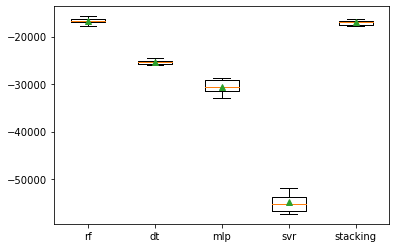

In [127]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### In this case, we can see that the random forest ensemble appears to perform better than any single model on average, achieving a mean negative MAE of about -16765.

# HyperParameter Tuning for Random Forest

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [132]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 2, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, Y_train);

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [133]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

# Evaluating random forest results

In [138]:
def evaluate(model, X_test,  Y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - Y_test)
    mape = 100 * np.mean(errors / Y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [139]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Average Error: 18544.9506 degrees.
Accuracy = 88.78%.


In [140]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 18179.6151 degrees.
Accuracy = 88.64%.


In [141]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.15%.


#### Random forest with default parameters performs best, hence using it for predictions

## Predict the sale price for test data

In [142]:
house_prices_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave  None      Reg   
1          20       RL         81.0    14267   Pave  None      IR1   
2          60       RL         74.0    13830   Pave  None      IR1   
3          60       RL         78.0     9978   Pave  None      IR1   
4         120       RL         43.0     5005   Pave  None      IR1   

  LandContour LotConfig LandSlope  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    Inside       Gtl  ...        0   None  MnPrv        None   
1         Lvl    Corner       Gtl  ...        0   None   None        Gar2   
2         Lvl    Inside       Gtl  ...        0   None  MnPrv        None   
3         Lvl    Inside       Gtl  ...        0   None   None        None   
4         HLS    Inside       Gtl  ...        0   None   None        None   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition TotalSF  
0       0       6    2010        WD         Normal  1778.0  
1   12500       6    2010        WD         Normal  2658.0  
2       0       3    2010        WD         Normal  2557.0  
3       0       6    2010        WD         Normal  2530.0  
4       0       1    2010        WD         Normal  2560.0  

[5 rows x 79 columns]

In [143]:
house_prices_test_dummy = pd.get_dummies(house_prices_test)

In [144]:
house_prices_test_dummy.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          1961         0.0       468.0       144.0  ...               0   
1          1958       108.0       923.0         0.0  ...               0   
2          1998         0.0       791.0         0.0  ...               0   
3          1998        20.0       602.0         0.0  ...               0   
4          1992         0.0       263.0         0.0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 284 columns]

In [154]:
test_df = house_prices_test_dummy.reindex(columns = X_train.columns, fill_value=0)

In [160]:
result = rf.predict(test_df)

In [163]:
result_dataframe = pd.DataFrame(result)

In [157]:
house_prices_test1 = pd.read_csv("C:\\Users\\akorade1\\Documents\\CIS-508\\Team Assignment 1\\house-prices-advanced-regression-techniques\\test.csv")

In [159]:
ids_df = house_prices_test1['Id']

In [164]:
output_df = pd.merge(ids_df,result_dataframe,how = 'left',left_index = True, right_index = True)

In [165]:
output_df.head()

Id              0
0  1461  128131.116966
1  1462  158349.274166
2  1463  180867.650859
3  1464  187395.111430
4  1465  202779.487723

In [166]:
output_df.to_csv('C:\\Users\\akorade1\\Documents\\CIS-508\\Team Assignment 1\\house-prices-advanced-regression-techniques\\TA_OP.csv') 